# Data Analysis

### Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the Dataset

In [4]:
df = pd.read_csv("../data/Walmart_Sales.csv")
df.head

<bound method NDFrame.head of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

         

### Clean and Prepare the Data

In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df = df.fillna(df.mean(numeric_only=True))

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


### Basic Statistics using Numpy

In [9]:
sales = df['Weekly_Sales'].to_numpy()

In [10]:
print("Total Enntries: ", len(sales))
print("Average Weekly Sales: ", np.mean(sales))
print("Maximum Weekly Sales: ", np.max(sales))
print("Minimum Weekly Sales: ", np.min(sales))
print("Standard Deviation: ", np.std(sales))

Total Enntries:  6435
Average Weekly Sales:  1046964.8775617715
Maximum Weekly Sales:  3818686.45
Minimum Weekly Sales:  209986.25
Standard Deviation:  564322.7690195543


### Correlation Analysis

In [11]:
temp_corr = np.corrcoef(df['Weekly_Sales'], df['Temperature'])[0, 1]
fuel_corr = np.corrcoef(df['Weekly_Sales'], df['Fuel_Price'])[0, 1]
cpi_corr = np.corrcoef(df['Weekly_Sales'], df['CPI'])[0, 1]

In [12]:
print("Correlation with Weekly Sales")
print(f"Temperature: {temp_corr:.3f}")
print(f"Fuel Price: {fuel_corr:.3f}")
print(f"CPI: {cpi_corr:.3f}")

Correlation with Weekly Sales
Temperature: -0.064
Fuel Price: 0.009
CPI: -0.073


### Sales Trend over time

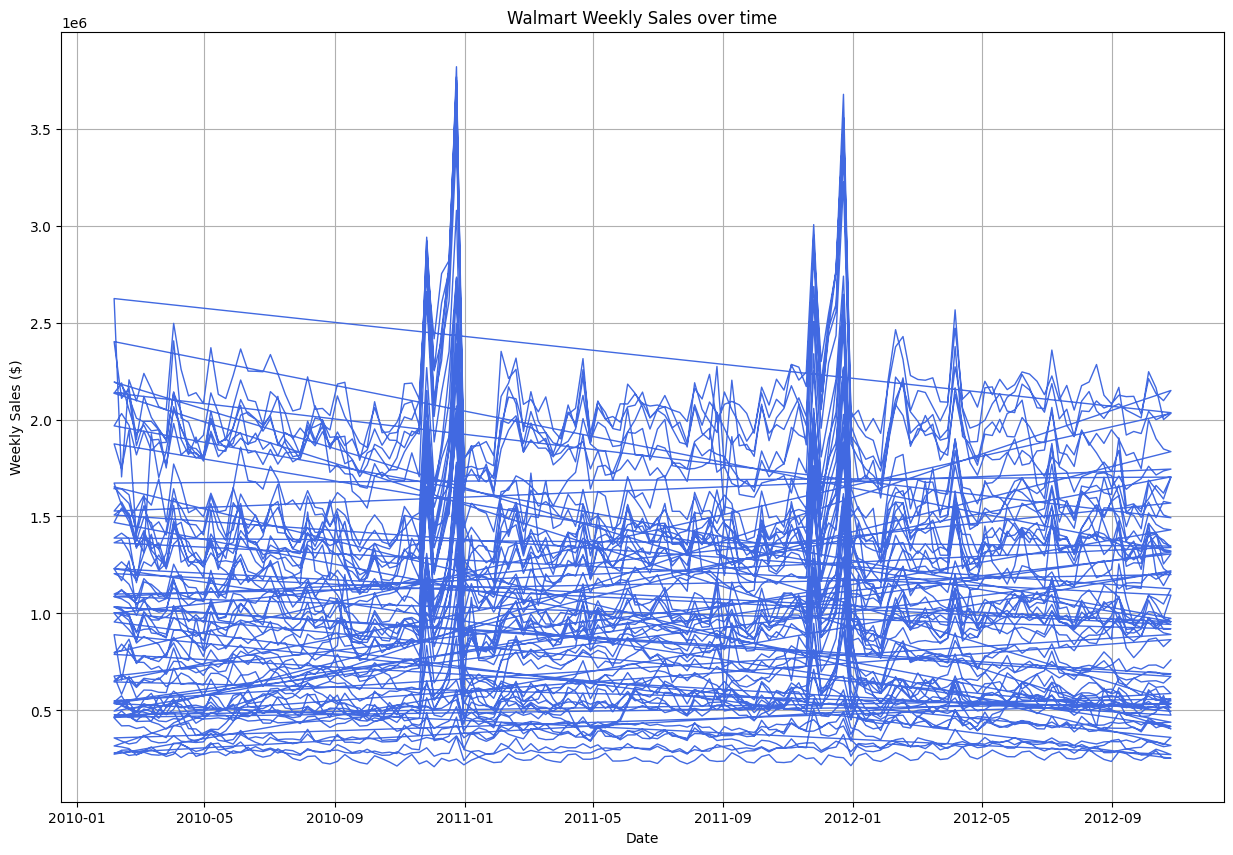

In [14]:
plt.figure(figsize=(15, 10))
plt.plot(df['Date'], df['Weekly_Sales'], color='royalblue', linewidth=1)
plt.title("Walmart Weekly Sales over time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales ($)")
plt.grid(True)
plt.show()

### Relationship Between Variables

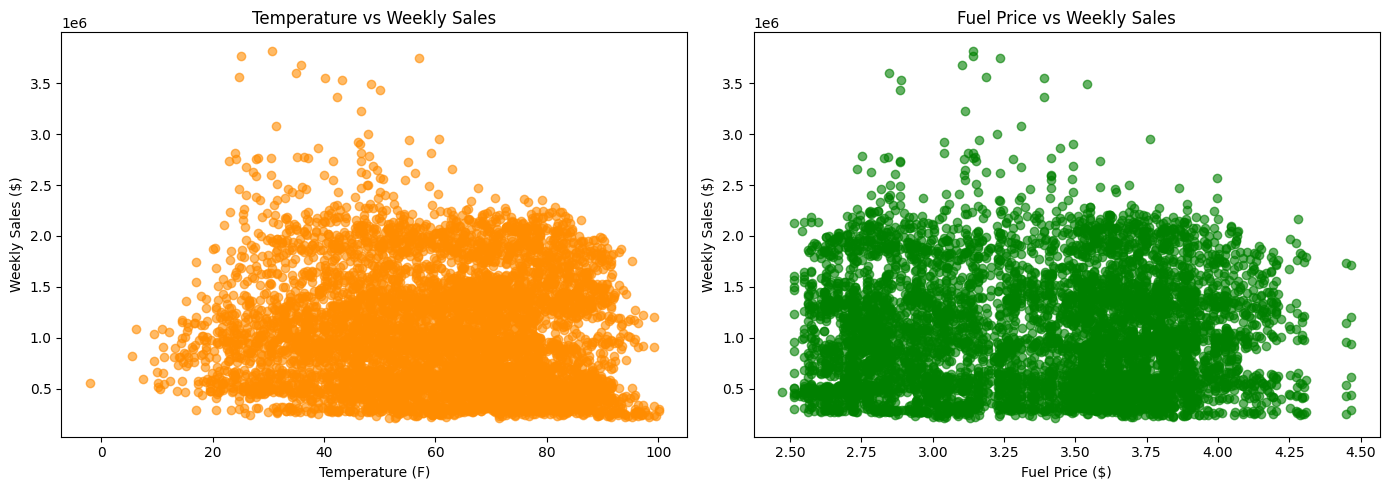

In [16]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(df['Temperature'], df['Weekly_Sales'], color='darkorange', alpha=0.6)
plt.title("Temperature vs Weekly Sales")
plt.xlabel("Temperature (F)")
plt.ylabel("Weekly Sales ($)")

plt.subplot(1,2,2)
plt.scatter(df['Fuel_Price'], df['Weekly_Sales'], color='green', alpha=0.6)
plt.title("Fuel Price vs Weekly Sales")
plt.xlabel("Fuel Price ($)")
plt.ylabel("Weekly Sales ($)")

plt.tight_layout()
plt.show()

### Holiday Impact on Sales

In [18]:
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales']

In [19]:
print("Average Holiday Sales: ", np.mean(holiday_sales))
print("Average Non-Hoilday Sales: ", np.mean(non_holiday_sales))

Average Holiday Sales:  1122887.8923555557
Average Non-Hoilday Sales:  1041256.3802088555


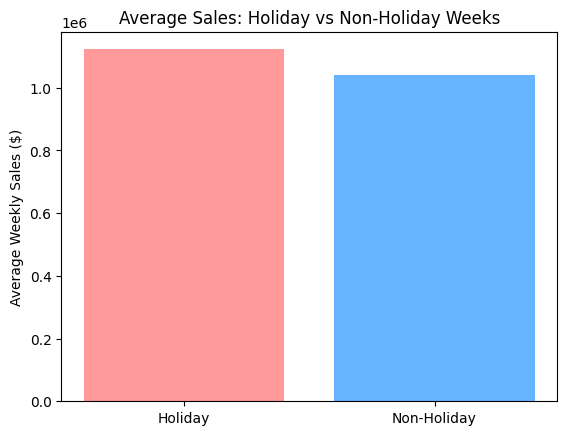

In [21]:
plt.bar(['Holiday', 'Non-Holiday'], [np.mean(holiday_sales), np.mean(non_holiday_sales)], color=['#ff9999', '#66b3ff'])
plt.title("Average Sales: Holiday vs Non-Holiday Weeks")
plt.ylabel("Average Weekly Sales ($)")
plt.show()